## Generate predictions from models

### Import packages 

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
tfkl = tf.keras.layers
import pandas as pd
from scipy.stats import linregress

### Import functions

In [2]:
import evaluation_functions
import importlib
importlib.reload(evaluation_functions)

<module 'evaluation_functions' from '/Users/paigepark/Desktop/deep-mort/code/evaluation_functions.py'>

### Import data

In [3]:
state_training = np.loadtxt('../data/state_training.txt')
state_test = np.loadtxt('../data/state_test.txt')

In [4]:
country_training = np.loadtxt('../data/country_training.txt')
country_test = np.loadtxt('../data/country_test.txt')

In [5]:
combined_training = np.loadtxt('../data/combined_training_new.txt')
combined_test = np.loadtxt('../data/combined_test_new.txt')

In [6]:
country_training_new = np.loadtxt('../data/country_training_new.txt')
country_test_new = np.loadtxt('../data/country_test_new.txt')

In [7]:
geos_key = np.load('../data/geos_key_new.npy')
geo_dict = {int(code): geo for geo, code in geos_key}

In [8]:
geos_key_old = np.load('../data/geos_key.npy')

In [9]:
# convert actual test data to log scale
country_test[:,4][country_test[:,4] == 0] = 9e-06
country_test[:,4] = np.log(country_test[:,4])

In [10]:
# convert actual test data to log scale
country_test_new[:,4][country_test_new[:,4] == 0] = 9e-06
country_test_new[:,4] = np.log(country_test_new[:,4])

In [11]:
# convert actual test data to log scale
combined_test[:,4][combined_test[:,4] == 0] = 9e-06
combined_test[:,4] = np.log(combined_test[:,4])

### Import predictions

In [119]:
# DL predictions - trained on all countries
dl_test_pred = []
for i in range(1,6):
    dl_test_pred.append(np.loadtxt(f"../data/dl_country_forecast{i}.txt"))

# LC predictions
lc_test_pred = []
for i in range(1,6):
    lc_test_pred_temp = np.loadtxt(f"../data/lc_forecast{i}.csv", delimiter=",")
    lc_test_pred_temp = lc_test_pred_temp[np.lexsort((lc_test_pred_temp[:, 1], lc_test_pred_temp[:, 3], lc_test_pred_temp[:, 2], lc_test_pred_temp[:, 0]))]
    lc_test_pred_temp[:,4][lc_test_pred_temp[:,4] == 0] = 9e-06
    lc_test_pred_temp[:,4] = np.log(lc_test_pred_temp[:,4])
    lc_test_pred.append(lc_test_pred_temp)

# hyndman-ullah predictions
hu_test_pred = []
for i in range(1,6):
    hu_test_pred_temp = np.loadtxt(f"../data/hu_forecast{i}.csv", delimiter=",")
    hu_test_pred_temp = hu_test_pred_temp[np.lexsort((hu_test_pred_temp[:, 1], hu_test_pred_temp[:, 3], hu_test_pred_temp[:, 2], hu_test_pred_temp[:, 0]))]
    hu_test_pred_temp[:,4][hu_test_pred_temp[:,4] == 0] = 9e-06
    hu_test_pred_temp[:,4] = np.log(hu_test_pred_temp[:,4])
    hu_test_pred.append(hu_test_pred_temp)

# coherent predictions
c_test_pred = []
for i in range(1,6):
    c_test_pred_temp = np.loadtxt(f"../data/coherent_forecast_test_{i}.csv", delimiter=",")
    c_test_pred_temp = c_test_pred_temp[np.lexsort((c_test_pred_temp[:, 1], c_test_pred_temp[:, 3], c_test_pred_temp[:, 2], c_test_pred_temp[:, 0]))]
    c_test_pred_temp[:,4][c_test_pred_temp[:,4] == 0] = 9e-06
    c_test_pred_temp[:,4] = np.log(c_test_pred_temp[:,4])
    c_test_pred.append(c_test_pred_temp)

# DL predictions - trained on all countries and states
combined_test_pred = []
for i in range(1,6):
    combined_test_pred.append(np.loadtxt(f"../data/combined_test_predictions_{i}.txt"))

In [18]:
geo_dict_countries_only = dict(list(geo_dict.items())[-40:])

In [19]:
geo_dict_countries_only

{50: 'AUS',
 51: 'AUT',
 52: 'BEL',
 53: 'BGR',
 54: 'BLR',
 55: 'CAN',
 56: 'CHE',
 57: 'CZE',
 58: 'DEUTE',
 59: 'DEUTW',
 60: 'DNK',
 61: 'ESP',
 62: 'EST',
 63: 'FIN',
 64: 'FRATNP',
 65: 'GBR_NIR',
 66: 'GBR_SCO',
 67: 'GBRTENW',
 68: 'GRC',
 69: 'HUN',
 70: 'IRL',
 71: 'ISL',
 72: 'ISR',
 73: 'ITA',
 74: 'JPN',
 75: 'LTU',
 76: 'LUX',
 77: 'LVA',
 78: 'NLD',
 79: 'NOR',
 80: 'NZL_NP',
 81: 'POL',
 82: 'PRT',
 83: 'RUS',
 84: 'SVK',
 85: 'SVN',
 86: 'SWE',
 87: 'TWN',
 88: 'UKR',
 89: 'USA'}

In [87]:
# loading in single country / single gender predictions 
single_preds_combined = []

for j in range(1,6):
    preds_for_iter = []
    for geo in geo_dict_countries_only.values():
        for gender in range(2):
            single_pred = np.load(f"../data/single_preds/{geo}_gender_{gender}_iter_{j}.npz")

            arr = list(single_pred.values())[0]
            preds_for_iter.append(arr)

    combined_array = np.vstack(preds_for_iter)
    
    single_preds_combined.append(combined_array)


In [88]:
print(single_preds_combined[0].shape)
print(c_test_pred[0].shape)
print(dl_test_pred[0].shape)
print(lc_test_pred[0].shape)
print(hu_test_pred[0].shape)
print(country_test_new.shape)

(79400, 5)
(80000, 5)
(79400, 5)
(80000, 5)
(80000, 5)
(79400, 5)


### Prep data for MSE by age, year, sex plots

In [120]:
actual_data_divided = []
actual_combined_divided = []
dl_test_divided = [[] for _ in range(5)]
combined_test_divided = [[] for _ in range(5)]
lc_test_divided = [[] for _ in range(5)]
hu_test_divided = [[] for _ in range(5)]
c_test_divided = [[] for _ in range(5)]
single_test_divided = [[] for _ in range(5)]

for j in range(5):
    for i in range(90):
        actual_combined_divided.append(combined_test[combined_test[:,0] == i])
        combined_test_divided[j].append(combined_test_pred[j][combined_test_pred[j][:, 0] == i])

for j in range(5):
    for i in range(50,90):
        actual_data_divided.append(country_test_new[country_test_new[:, 0] == i])
        dl_test_divided[j].append(dl_test_pred[j][dl_test_pred[j][:, 0] == i])
        lc_test_divided[j].append(lc_test_pred[j][lc_test_pred[j][:, 0] == i])
        hu_test_divided[j].append(hu_test_pred[j][hu_test_pred[j][:, 0] == i])
        c_test_divided[j].append(c_test_pred[j][c_test_pred[j][:, 0] == i])
        single_test_divided[j].append(single_preds_combined[j][single_preds_combined[j][:, 0] == i])


In [65]:
print("Single log-rates shape:", single_test_divided[j][i][:, 4].shape)
print("DL log-rates shape:", dl_test_divided[j][i][:, 4].shape)



Single log-rates shape: (2000,)
DL log-rates shape: (2000,)


# Figures in Paper

### Overall performance (Figure 1)

In [121]:
lc_all = []
hu_all = []
coh_all = []
dl_all = []
single_all = []

for j in range(5):
    lc_mse_results_by_country = []
    hu_mse_results_by_country = []
    coh_mse_results_by_country = []
    dl_mse_results_by_country = []
    single_mse_results_by_country = []
    for i in range(0,40):
        lc_mse_overall, lc_rmse_overall, lc_rrmse_overall = evaluation_functions.calculate_error(lc_test_divided[j][i], actual_data_divided[i])
        hu_mse_overall, hu_rmse_overall, hu_rrmse_overall = evaluation_functions.calculate_error(hu_test_divided[j][i], actual_data_divided[i])
        coh_mse_overall, coh_rmse_overall, coh_rrmse_overall = evaluation_functions.calculate_error(c_test_divided[j][i], actual_data_divided[i])
        dl_mse_overall, dl_rmse_overall, dl_rrmse_overall = evaluation_functions.calculate_error(dl_test_divided[j][i], actual_data_divided[i])
        single_mse_overall, single_rmse_overall, single_rrmse_overall = evaluation_functions.calculate_error(single_test_divided[j][i], actual_data_divided[i]) 
        
        lc_mse_results_by_country.append(lc_mse_overall)
        hu_mse_results_by_country.append(hu_mse_overall)
        coh_mse_results_by_country.append(coh_mse_overall)
        dl_mse_results_by_country.append(dl_mse_overall)
        single_mse_results_by_country.append(single_mse_overall)

    lc_all.append(np.array(lc_mse_results_by_country))
    hu_all.append(np.array(hu_mse_results_by_country))
    coh_all.append(np.array(coh_mse_results_by_country))
    dl_all.append(np.array(dl_mse_results_by_country))
    single_all.append(np.array(single_mse_results_by_country))

In [122]:
# average mses by country
lc_ave_by_country = sum(lc_all) / len(lc_all)
hu_ave_by_country = sum(hu_all) / len(hu_all)
coh_ave_by_country = sum(coh_all) / len(coh_all)
dl_ave_by_country = sum(dl_all) / len(dl_all)
single_ave_by_country = sum(single_all) / len(single_all)

In [123]:
lc_overall = []
hu_overall = []
coh_overall = []
dl_overall = []
single_overall = []

for i in range(5):    
    lc_mse_overall, lc_rmse_overall, lc_rrmse_overall = evaluation_functions.calculate_error(lc_test_pred[i], country_test_new)
    hu_mse_overall, hu_rmse_overall, hu_rrmse_overall = evaluation_functions.calculate_error(hu_test_pred[i], country_test_new)
    coh_mse_overall, coh_rmse_overall, coh_rrmse_overall = evaluation_functions.calculate_error(c_test_pred[i], country_test_new)
    dl_mse_overall, dl_rmse_overall, dl_rrmse_overall = evaluation_functions.calculate_error(dl_test_pred[i], country_test_new)
    single_mse_overall, single_rmse_overall, single_rrmse_overall = evaluation_functions.calculate_error(single_preds_combined[i], country_test_new)

    lc_overall.append(lc_mse_overall)
    hu_overall.append(hu_mse_overall)
    coh_overall.append(coh_mse_overall)
    dl_overall.append(dl_mse_overall)
    single_overall.append(single_mse_overall)

lc_overall_ave = sum(lc_overall) / len(lc_overall)
hu_overall_ave = sum(hu_overall) / len(hu_overall)
coh_overall_ave = sum(coh_overall) / len(coh_overall)
dl_overall_ave = sum(dl_overall) / len(dl_overall)
single_overall_ave = sum(single_overall) / len(single_overall)

print(lc_overall_ave)
print(hu_overall_ave)
print(coh_overall_ave)
print(dl_overall_ave)
print(single_overall_ave)

0.23117569523055148
0.2082319334080825
0.1806944185257018
0.1677685880645363
0.18634398366095278


In [93]:
print(country_test_new.shape)
print(single_preds_combined[0].shape)
print(dl_test_pred[0].shape)

(79400, 5)
(79400, 5)
(79400, 5)


Plot with no table

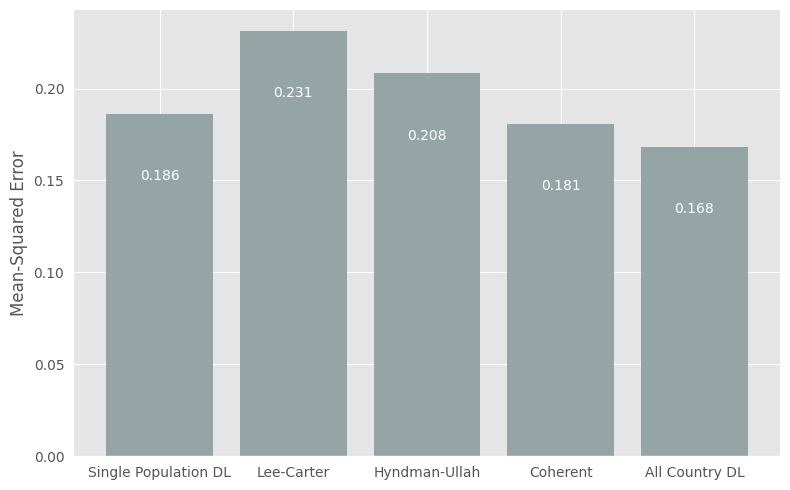

In [95]:
overalls = np.array([single_overall_ave, lc_overall_ave, hu_overall_ave, coh_overall_ave, dl_overall_ave]) 
labels = ['Single Population DL', 'Lee-Carter', 'Hyndman-Ullah', 'Coherent', 'All Country DL']

# Set style
plt.style.use('ggplot')

# Create the plot
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(labels, overalls, color='#95A5A6')  # Soft blue-gray

# Remove spines and unnecessary ticks
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(left=False, bottom=False)

# Add value labels inside bars
for bar in bars:
    yval = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width()/2,
        yval - 0.03,  # Position inside the bar
        f'{yval:.3f}',
        ha='center',
        va='top',
        fontsize=10,
        color='white' if yval > 0.15 else 'black'  # Adjust for contrast if needed
    )

# Minimalist layout
ax.set_ylabel('Mean-Squared Error')
ax.set_xlabel('')
plt.tight_layout()
#plt.savefig("../results/overall_barplot.pdf", format="pdf")
plt.show()


Plot with table

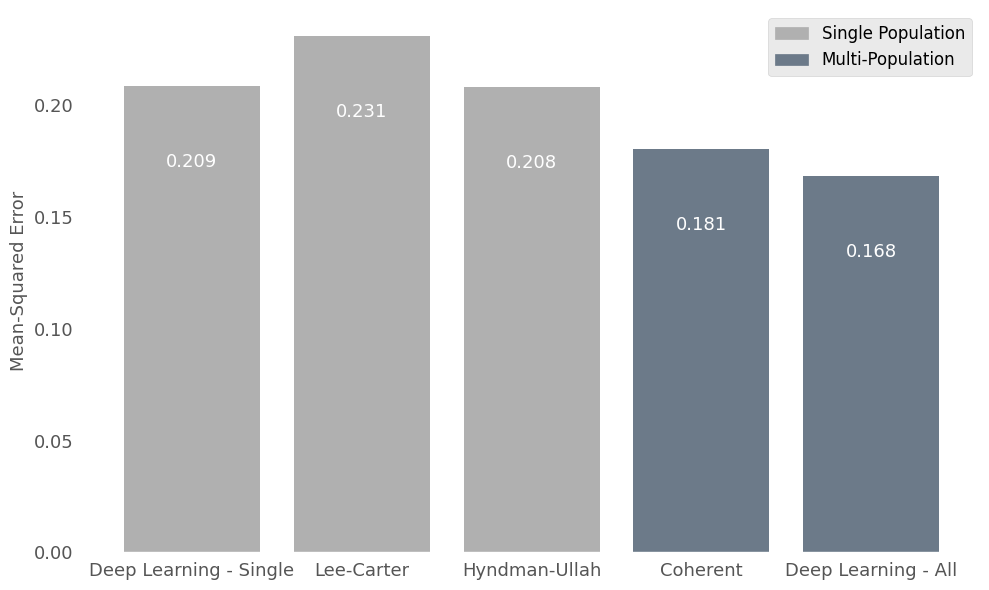

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Data (no Lee-Carter)
overalls = np.array([single_ctry_gender_overall_ave, lc_overall_ave, hu_overall_ave, coh_overall_ave, dl_overall_ave])
labels = ['Deep Learning - Single', 'Lee-Carter', 'Hyndman-Ullah', 'Coherent', 'Deep Learning - All']

# Define bar colors: light gray for single-country, darker gray-blue for multi-country
bar_colors = ['#B0B0B0', '#B0B0B0', '#B0B0B0', '#6C7A89', '#6C7A89']  # Soft neutral tones

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor('white')

bars = ax.bar(labels, overalls, color=bar_colors)

# Clean axes
ax.set_facecolor('white')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(left=False, bottom=False, labelsize=13)

# Bar labels
for bar in bars:
    yval = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2,
        yval - 0.03,
        f'{yval:.3f}',
        ha='center',
        va='top',
        fontsize=13,
        color='white' if yval > 0.15 else 'black'
    )

# Legend with neutral tones
legend_handles = [
    mpatches.Patch(color='#B0B0B0', label='Single Population'),
    mpatches.Patch(color='#6C7A89', label='Multi-Population')
]
ax.legend(handles=legend_handles, fontsize=12, loc='upper right')

# Final labels
ax.set_ylabel('Mean-Squared Error', fontsize=13)
ax.set_xlabel('')

plt.tight_layout()
#plt.savefig("../results/overall_barplot_with_legend.pdf", format="pdf")
plt.show()



### Results by country (Table 1)

In [96]:
overalls = np.array([lc_overall_ave, hu_overall_ave, single_overall_ave, coh_overall_ave, dl_overall_ave])
labels = ['Lee-Carter', 'Hyndman-Ullah', 'Single Population DL', 'Coherent', 'All Country DL']

In [97]:
mse_results_by_country = np.column_stack((lc_ave_by_country, hu_ave_by_country, single_ave_by_country, coh_ave_by_country, dl_ave_by_country))

In [98]:
len(lc_ave_by_country)

40

In [124]:
print(overalls)

[0.2311757  0.20823193 0.18634398 0.18069442 0.16837738]


In [99]:
new_mses = np.row_stack([mse_results_by_country, overalls])

In [110]:
new_mses.shape

(41, 5)

In [107]:
# add a row to geos_key for overall mses
geos_key
new = np.array([["Overall", 90]])
geos_key_with_overall = np.vstack([geos_key, new])

In [114]:
# change geo abbreviations to full name for table
full_names_mapping = {
    # US states
    'AK': 'Alaska', 'AL': 'Alabama', 'AZ': 'Arizona', 'AR': 'Arkansas',
    'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware',
    'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'IA': 'Iowa', 'ID': 'Idaho',
    'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas', 'KY': 'Kentucky',
    'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts',
    'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri',
    'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire',
    'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina',
    'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon',
    'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota',
    'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont',
    'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming',

    # Countries
    'AUS': 'Australia', 'AUT': 'Austria', 'BEL': 'Belgium', 'BGR': 'Bulgaria', 'BLR': 'Belarus',
    'CAN': 'Canada', 'CHE': 'Switzerland', 'CZE': 'Czech Republic', 'DNK': 'Denmark', 'DEUTE': 'East Germany',
    'DEUTW': 'West Germany',
    'ESP': 'Spain', 'EST': 'Estonia', 'FIN': 'Finland', 'FRATNP': 'France',
    'GBRTENW': 'England and Wales', 'GBR_NIR': 'Northern Ireland',
    'GBR_SCO': 'Scotland', 'GRC': 'Greece', 'HUN': 'Hungary', 'IRL': 'Ireland',
    'ISL': 'Iceland', 'ISR': 'Israel', 'ITA': 'Italy', 'JPN': 'Japan', 'LTU': 'Lithuania',
    'LUX': 'Luxembourg', 'LVA': 'Latvia', 'NLD': 'Netherlands', 'NOR': 'Norway',
    'NZL_NP': 'New Zealand', 'POL': 'Poland', 'PRT': 'Portugal', 'RUS': 'Russia',
    'SVK': 'Slovakia', 'SVN': 'Slovenia', 'SWE': 'Sweden', 'TWN': 'Taiwan',
    'UKR': 'Ukraine', 'USA': 'United States', 'NZL_NM': 'New Zealand',
    'Overall': 'Overall'
}

# Convert existing array
geos_key_full_names = np.array([
    [full_names_mapping.get(code, code), idx] for code, idx in geos_key_with_overall
])

In [115]:
len(np.unique(country_training_new[:,0]))+1

41

In [116]:
percent_improvement_all_countries = []
for i in range(0,len(np.unique(country_training_new[:,0]))+1):
    val = (1 - new_mses[i][4] / new_mses[i][3]) * 100
    percent_improvement_all_countries.append(val)


In [117]:
mses_with_percent_imp = np.column_stack((new_mses, percent_improvement_all_countries))

In [118]:
# create a DataFrame
df_mse = pd.DataFrame(
    mses_with_percent_imp,
    columns=['LC', 'HU', 'DL Single', 'Coherent', 'DL All', "\% Impr. DL vs Coherent"],
    index=[geos_key_full_names[i+50, 0] for i in range(len(new_mses))]
)
# round
df_mse = df_mse.round(3)


# sort by the last column in descending order
df_data = df_mse.iloc[:-1]
df_overall = df_mse.iloc[-1:]
df_data_sorted = df_data.sort_values(by="\% Impr. DL vs Coherent", ascending=False)

# concatenate the sorted data with the overall row at the end
df_final = pd.concat([df_data_sorted, df_overall])

# convert the DataFrame to a LaTeX formatted table
latex_table = df_final.to_latex(index=True, float_format="%.3f")

# display the LaTeX code
print(latex_table)


\begin{tabular}{lrrrrrr}
\toprule
 & LC & HU & DL Single & Coherent & DL All & \% Impr. DL vs Coherent \\
\midrule
Ukraine & 0.083 & 0.086 & 0.043 & 0.050 & 0.027 & 46.206 \\
Spain & 0.091 & 0.073 & 0.041 & 0.065 & 0.041 & 36.863 \\
Hungary & 0.202 & 0.114 & 0.064 & 0.080 & 0.060 & 25.662 \\
England and Wales & 0.024 & 0.019 & 0.012 & 0.023 & 0.019 & 19.612 \\
Switzerland & 0.137 & 0.123 & 0.095 & 0.121 & 0.098 & 18.996 \\
Finland & 0.151 & 0.140 & 0.134 & 0.135 & 0.112 & 17.270 \\
Slovenia & 0.699 & 0.616 & 0.555 & 0.538 & 0.457 & 15.029 \\
Ireland & 0.140 & 0.138 & 0.123 & 0.122 & 0.105 & 13.764 \\
Belarus & 0.142 & 0.142 & 0.088 & 0.069 & 0.060 & 12.756 \\
Belgium & 0.063 & 0.062 & 0.053 & 0.054 & 0.047 & 11.644 \\
Lithuania & 0.196 & 0.198 & 0.178 & 0.169 & 0.150 & 11.598 \\
Austria & 0.074 & 0.068 & 0.068 & 0.070 & 0.062 & 11.037 \\
Russia & 0.120 & 0.102 & 0.068 & 0.040 & 0.036 & 10.810 \\
Luxembourg & 1.798 & 1.615 & 1.481 & 1.404 & 1.278 & 9.037 \\
Estonia & 0.812 & 0.707 & 0.5

### Top performers (Figure 3)

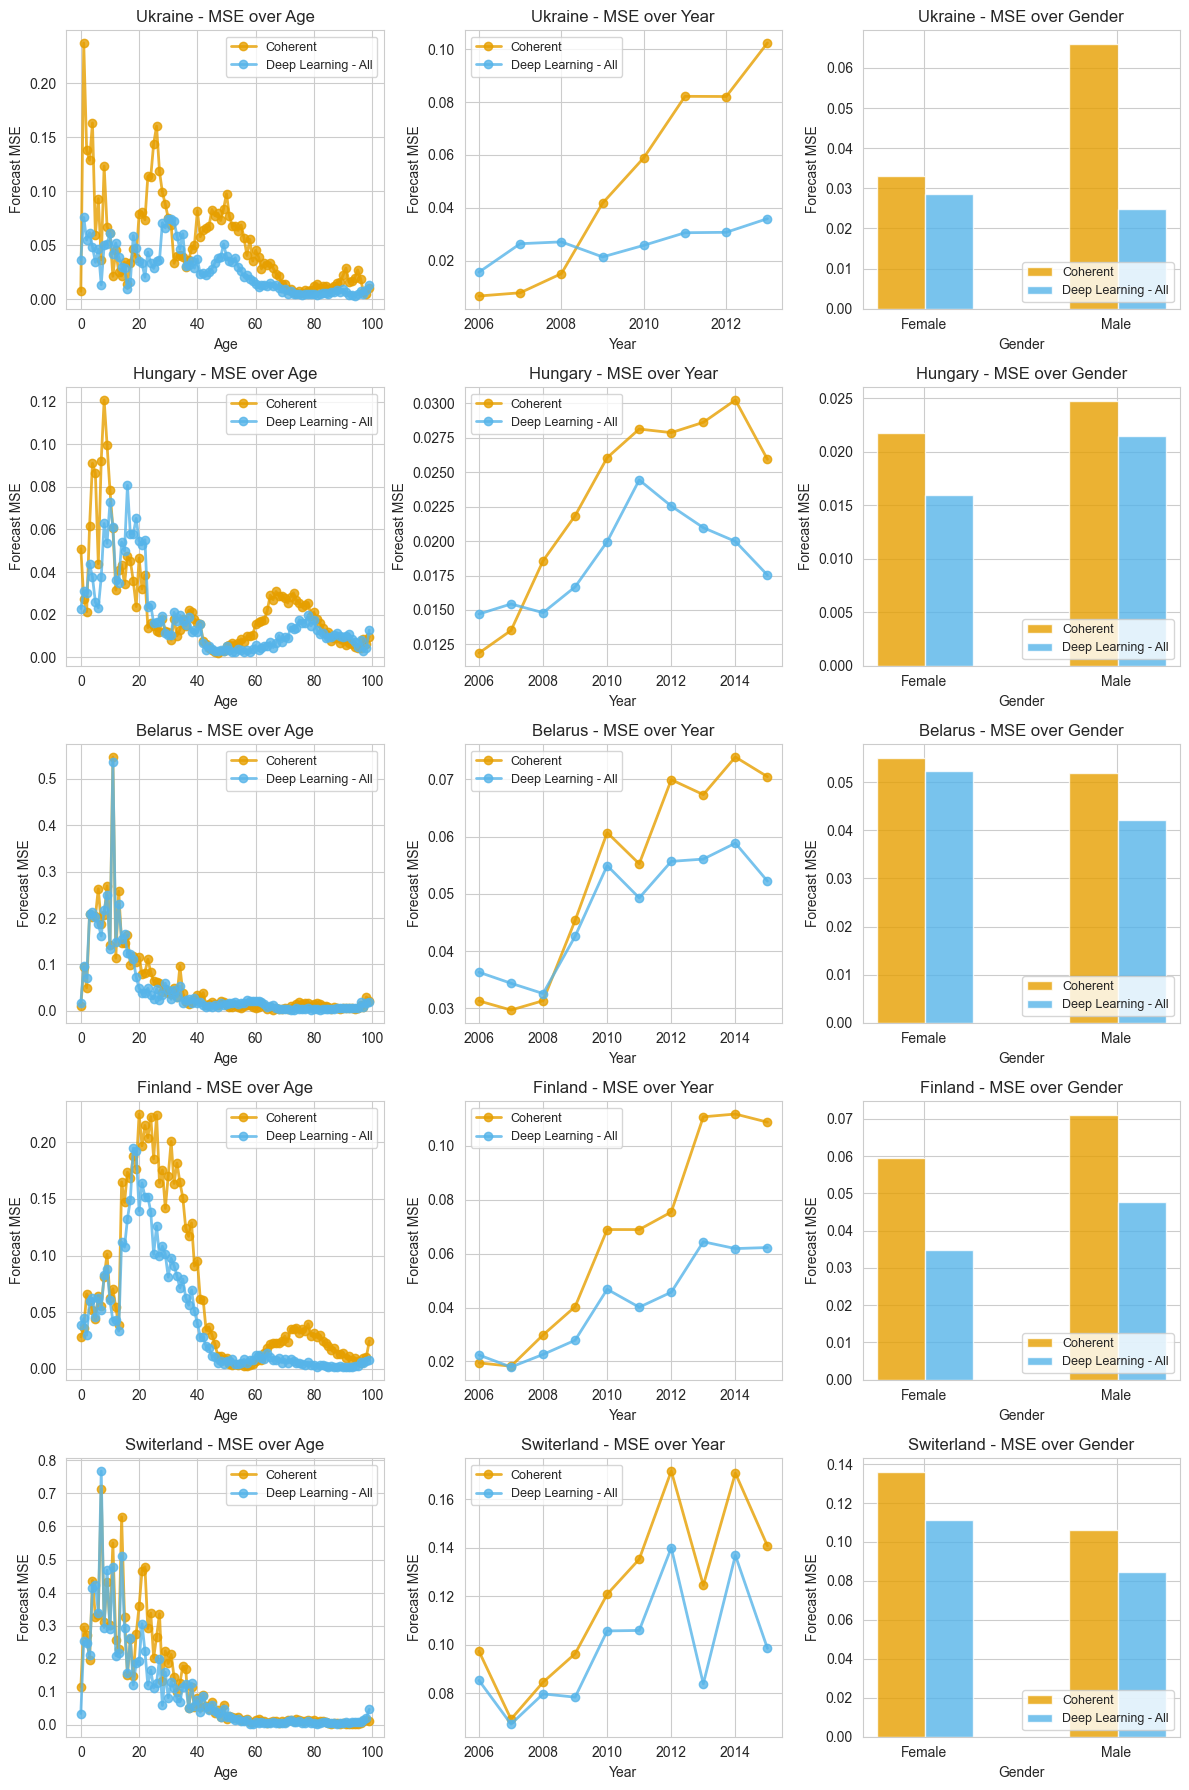

In [21]:
# Simple top performer / US figures 
sns.set_style("whitegrid")
palette = ["#E69F00", "#56B4E9", "#009E73"]  # orange, sky blue, green

def compute_avg_mses(country_index, feature_index):
    model_data = {
        "Coherent": c_test_divided,
        "Deep Learning - All": dl_test_divided
    }
    avg_mses = {}

    for label, test_data in model_data.items():
        mse_list = []
        for i in range(5):
            mse, _, _ = evaluation_functions.calculate_error_by_category(
                test_data[i][country_index],
                actual_data_divided[country_index],
                feature_index=feature_index
            )
            mse_list.append(mse)

        combined = {}
        for d in mse_list:
            for k, v in d.items():
                if k not in combined:
                    combined[k] = [v, 1]
                else:
                    combined[k][0] += v
                    combined[k][1] += 1
        avg_mses[label] = {k: total / count for k, (total, count) in combined.items()}

    return avg_mses

countries = {"Ukraine": 38, "Hungary": 17, "Belarus": 2, "Finland": 11, "Switerland": 6}
features = {"Age": 3, "Year": 2, "Gender": 1}  # Note: "Gender" has feature_index = 1

fig, axes = plt.subplots(5, 3, figsize=(12, 18), sharey=False)
axes = axes.flatten()

for idx, (country_name, country_index) in enumerate(countries.items()):
    for jdx, (feature_name, feature_index) in enumerate(features.items()):
        avg_mses = compute_avg_mses(country_index, feature_index)
        ax = axes[idx * len(features) + jdx]  # Corrected indexing

        for i, (label, data) in enumerate(avg_mses.items()):
            keys, values = zip(*sorted(data.items()))

            if feature_index == 1:  # Gender (categorical)
                x = np.arange(len(keys)) + i * 0.25  # offset bars
                ax.bar(x, values, width=0.25, label=label, alpha=0.8, color=palette[i])
                gender_labels = ['Female' if k == 0 else 'Male' for k in keys]
                ax.set_xticks(np.arange(len(keys)) + 0.12)
                ax.set_xticklabels(gender_labels)
                ax.legend(fontsize=9, loc='lower right', frameon=True)
            else:
                ax.plot(keys, values, label=label, linestyle='-', marker='o',
                        linewidth=2, alpha=0.8, color=palette[i])
                ax.legend(fontsize=9, loc='best', frameon=True)

        ax.set_title(f"{country_name} - MSE over {feature_name}")
        ax.set_xlabel(feature_name)
        ax.set_ylabel("Forecast MSE")
        

plt.tight_layout()
plt.savefig("../results/top_6x3.pdf", format="pdf", bbox_inches="tight")
plt.show()


# US (Figure 4)

In [31]:
# Set country index to 50 - geos_key
country_index = 37

In [32]:
# coherent average mses
c_mse_list = []
c_rmse_list = []
c_rrmse_list = []

for i in range(5):
    c_mse, c_rmse, c_rrmse = evaluation_functions.calculate_error_by_category(c_test_divided[i][country_index], actual_data_divided[country_index], feature_index=3) # 3 is age 
    c_mse_list.append(c_mse)
    c_rmse_list.append(c_rmse)
    c_rrmse_list.append(c_rrmse)

combined = {}

for d in c_mse_list:
    for k, v in d.items():
        if k not in combined:
            combined[k] = [v, 1]  # [sum, count]
        else:
            combined[k][0] += v
            combined[k][1] += 1

c_ave_mses_age = {k: total / count for k, (total, count) in combined.items()}

In [33]:
dl_mse_list = []
dl_rmse_list = []
dl_rrmse_list = []

for i in range(5):
    dl_mse, dl_rmse, dl_rrmse = evaluation_functions.calculate_error_by_category(dl_test_divided[i][country_index], actual_data_divided[country_index], feature_index=3) 
    dl_mse_list.append(dl_mse)
    dl_rmse_list.append(dl_rmse)
    dl_rrmse_list.append(dl_rrmse)

combined = {}

for d in dl_mse_list:
    for k, v in d.items():
        if k not in combined:
            combined[k] = [v, 1]  # [sum, count]
        else:
            combined[k][0] += v
            combined[k][1] += 1

dl_ave_mses_age = {k: total / count for k, (total, count) in combined.items()}

In [34]:
combined_index = 87
combined_mse_list = []
combined_rmse_list = []
combined_rrmse_list = []

for i in range(5):
    combined_mse, combined_rmse, combined_rrmse = evaluation_functions.calculate_error_by_category(combined_test_divided[i][combined_index], actual_combined_divided[combined_index], feature_index=3) 
    combined_mse_list.append(combined_mse)
    combined_rmse_list.append(combined_rmse)
    combined_rrmse_list.append(combined_rrmse)

combined = {}

for d in combined_mse_list:
    for k, v in d.items():
        if k not in combined:
            combined[k] = [v, 1]  # [sum, count]
        else:
            combined[k][0] += v
            combined[k][1] += 1

combined_ave_mses_age = {k: total / count for k, (total, count) in combined.items()}

Getting results by year 

In [35]:
# coherent average mses
c_mse_list = []
c_rmse_list = []
c_rrmse_list = []

for i in range(5):
    c_mse, c_rmse, c_rrmse = evaluation_functions.calculate_error_by_category(c_test_divided[i][country_index], actual_data_divided[country_index], feature_index=2) 
    c_mse_list.append(c_mse)
    c_rmse_list.append(c_rmse)
    c_rrmse_list.append(c_rrmse)

combined = {}

for d in c_mse_list:
    for k, v in d.items():
        if k not in combined:
            combined[k] = [v, 1]  # [sum, count]
        else:
            combined[k][0] += v
            combined[k][1] += 1

c_ave_mses_year = {k: total / count for k, (total, count) in combined.items()}

In [36]:
dl_mse_list = []
dl_rmse_list = []
dl_rrmse_list = []

for i in range(5):
    dl_mse, dl_rmse, dl_rrmse = evaluation_functions.calculate_error_by_category(dl_test_divided[i][country_index], actual_data_divided[country_index], feature_index=2) 
    dl_mse_list.append(dl_mse)
    dl_rmse_list.append(dl_rmse)
    dl_rrmse_list.append(dl_rrmse)

combined = {}

for d in dl_mse_list:
    for k, v in d.items():
        if k not in combined:
            combined[k] = [v, 1]  # [sum, count]
        else:
            combined[k][0] += v
            combined[k][1] += 1

dl_ave_mses_year = {k: total / count for k, (total, count) in combined.items()}

In [37]:
combined_index = 87
combined_mse_list = []
combined_rmse_list = []
combined_rrmse_list = []

for i in range(5):
    combined_mse, combined_rmse, combined_rrmse = evaluation_functions.calculate_error_by_category(combined_test_divided[i][combined_index], actual_combined_divided[combined_index], feature_index=2) 
    combined_mse_list.append(combined_mse)
    combined_rmse_list.append(combined_rmse)
    combined_rrmse_list.append(combined_rrmse)

combined = {}

for d in combined_mse_list:
    for k, v in d.items():
        if k not in combined:
            combined[k] = [v, 1]  # [sum, count]
        else:
            combined[k][0] += v
            combined[k][1] += 1

combined_ave_mses_year = {k: total / count for k, (total, count) in combined.items()}

Getting results by gender

In [38]:
# coherent average mses
c_mse_list = []
c_rmse_list = []
c_rrmse_list = []

for i in range(5):
    c_mse, c_rmse, c_rrmse = evaluation_functions.calculate_error_by_category(c_test_divided[i][country_index], actual_data_divided[country_index], feature_index=1) 
    c_mse_list.append(c_mse)
    c_rmse_list.append(c_rmse)
    c_rrmse_list.append(c_rrmse)

combined = {}

for d in c_mse_list:
    for k, v in d.items():
        if k not in combined:
            combined[k] = [v, 1]  # [sum, count]
        else:
            combined[k][0] += v
            combined[k][1] += 1

c_ave_mses_gender = {k: total / count for k, (total, count) in combined.items()}

In [39]:
dl_mse_list = []
dl_rmse_list = []
dl_rrmse_list = []

for i in range(5):
    dl_mse, dl_rmse, dl_rrmse = evaluation_functions.calculate_error_by_category(dl_test_divided[i][country_index], actual_data_divided[country_index], feature_index=1) 
    dl_mse_list.append(dl_mse)
    dl_rmse_list.append(dl_rmse)
    dl_rrmse_list.append(dl_rrmse)

combined = {}

for d in dl_mse_list:
    for k, v in d.items():
        if k not in combined:
            combined[k] = [v, 1]  # [sum, count]
        else:
            combined[k][0] += v
            combined[k][1] += 1

dl_ave_mses_gender = {k: total / count for k, (total, count) in combined.items()}

In [40]:
combined_index = 87
combined_mse_list = []
combined_rmse_list = []
combined_rrmse_list = []

for i in range(5):
    combined_mse, combined_rmse, combined_rrmse = evaluation_functions.calculate_error_by_category(combined_test_divided[i][combined_index], actual_combined_divided[combined_index], feature_index=1) 
    combined_mse_list.append(combined_mse)
    combined_rmse_list.append(combined_rmse)
    combined_rrmse_list.append(combined_rrmse)

combined = {}

for d in combined_mse_list:
    for k, v in d.items():
        if k not in combined:
            combined[k] = [v, 1]  # [sum, count]
        else:
            combined[k][0] += v
            combined[k][1] += 1

combined_ave_mses_gender = {k: total / count for k, (total, count) in combined.items()}

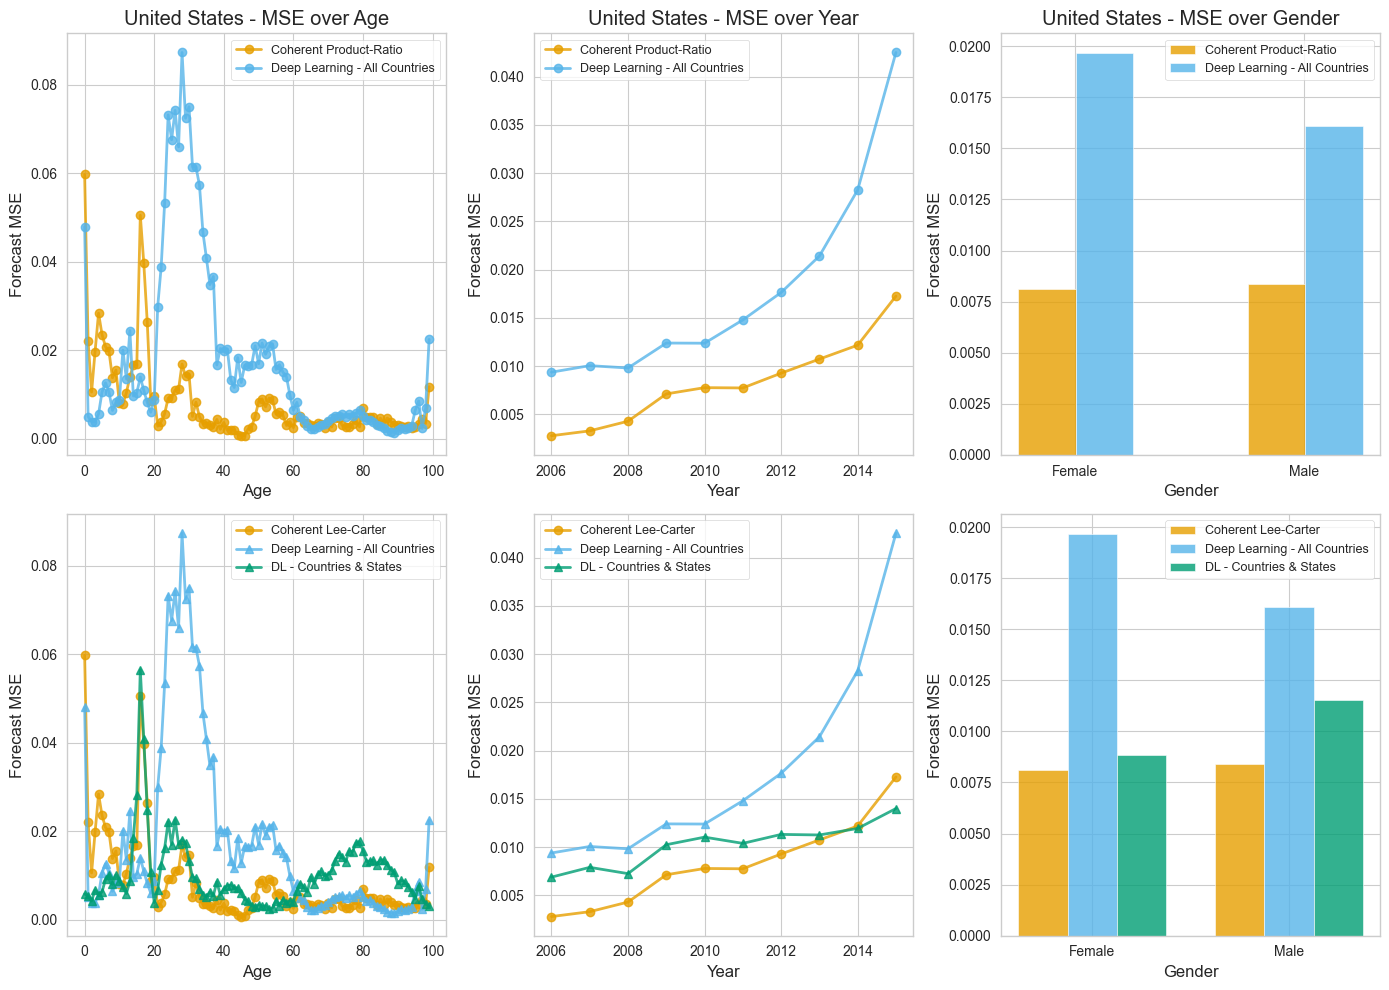

In [41]:
sns.set_style("whitegrid")
palette = ["#E69F00", "#56B4E9", "#009E73"]

# Prepare the sorted data
# For Age
keys1_age, values1_age = zip(*sorted(c_ave_mses_age.items()))
keys2_age, values2_age = zip(*sorted(dl_ave_mses_age.items()))
keys3_age, values3_age = zip(*sorted(combined_ave_mses_age.items()))

# For Year
keys1_year, values1_year = zip(*sorted(c_ave_mses_year.items()))
keys2_year, values2_year = zip(*sorted(dl_ave_mses_year.items()))
keys3_year, values3_year = zip(*sorted(combined_ave_mses_year.items()))

# For Year
keys1_gender, values1_gender = zip(*sorted(c_ave_mses_gender.items()))
keys2_gender, values2_gender = zip(*sorted(dl_ave_mses_gender.items()))
keys3_gender, values3_gender = zip(*sorted(combined_ave_mses_gender.items()))

fig, axes = plt.subplots(2, 3, figsize=(14, 10))  # 2 rows, 3 columns
axes = axes.flatten()

# --- Top row: Individual country results (e.g., United States) ---
countries = {"United States": 37}
features = {"Age": 3, "Year": 2, "Gender": 1}

for idx, (country_name, country_index) in enumerate(countries.items()):
    for jdx, (feature_name, feature_index) in enumerate(features.items()):
        avg_mses = compute_avg_mses(country_index, feature_index)
        ax = axes[idx * len(features) + jdx]  # Corrected indexing

        for i, (label, data) in enumerate(avg_mses.items()):
            keys, values = zip(*sorted(data.items()))

            if feature_index == 1:  # Gender (categorical)
                x = np.arange(len(keys)) + i * 0.25  # offset bars
                ax.bar(x, values, width=0.25, label=label, alpha=0.8, color=palette[i])
                gender_labels = ['Female' if k == 0 else 'Male' for k in keys]
                ax.set_xticks(np.arange(len(keys)) + 0.12)
                ax.set_xticklabels(gender_labels)
                ax.legend(fontsize=9, loc='upper right')
            else:
                ax.plot(keys, values, label=label, linestyle='-', marker='o',
                        linewidth=2, alpha=0.8, color=palette[i])
                ax.legend(fontsize=9, loc='best')

        ax.set_title(f"{country_name} - MSE over {feature_name}")
        ax.set_xlabel(feature_name)
        ax.set_ylabel("Forecast MSE")

# --- Bottom row: Combined model comparisons ---
# Age
axes[3].plot(keys1_age, values1_age, label="Coherent Lee-Carter", color=palette[0], linestyle='-', marker='o', linewidth=2, alpha=0.8)
axes[3].plot(keys2_age, values2_age, label="Deep Learning - All Countries", color=palette[1], linestyle='-', marker='^', linewidth=2, alpha=0.8)
axes[3].plot(keys3_age, values3_age, label="DL - Countries & States", color=palette[2], linestyle='-', marker='^', linewidth=2, alpha=0.8)
axes[3].set_xlabel("Age")
axes[3].set_ylabel("Forecast MSE")
axes[3].legend(fontsize=9)

# Year
axes[4].plot(keys1_year, values1_year, label="Coherent Lee-Carter", color=palette[0], linestyle='-', marker='o', linewidth=2, alpha=0.8)
axes[4].plot(keys2_year, values2_year, label="Deep Learning - All Countries", color=palette[1], linestyle='-', marker='^', linewidth=2, alpha=0.8)
axes[4].plot(keys3_year, values3_year, label="DL - Countries & States", color=palette[2], linestyle='-', marker='^', linewidth=2, alpha=0.8)
axes[4].set_xlabel("Year")
axes[4].set_ylabel("Forecast MSE")
axes[4].legend(fontsize=9)

# Gender
ax = axes[5]
keys = list(keys1_gender)  # should be [0, 1]
x = np.arange(len(keys))

bar_width = 0.25

# Offset each set of bars
ax.bar(x - bar_width, values1_gender, width=bar_width, label="Coherent Lee-Carter", color=palette[0], alpha=0.8)
ax.bar(x, values2_gender, width=bar_width, label="Deep Learning - All Countries", color=palette[1], alpha=0.8)
ax.bar(x + bar_width, values3_gender, width=bar_width, label="DL - Countries & States", color=palette[2], alpha=0.8)

# Labeling
gender_labels = ['Female' if k == 0 else 'Male' for k in keys]
ax.set_xticks(x)
ax.set_xticklabels(gender_labels)

ax.set_xlabel("Gender")
ax.set_ylabel("Forecast MSE")
ax.legend(fontsize=9)

plt.tight_layout()
plt.savefig("../results/combined_us_3x3.pdf", format="pdf", bbox_inches="tight")
plt.show()


# Supplement figures

Log simulation

In [42]:
# Define true mortality rates
young_rate = 0.0004
middle_rate = 0.004
old_rate = 0.2

rates = np.array([young_rate, middle_rate, old_rate])
age_labels = ['Young', 'Middle-aged', 'Old']

# Convert to log scale
log_rates = np.log(rates)

# Simulate model prediction with fixed error in log space
log_error_value = 0.2
log_preds = log_rates + log_error_value

# Convert predictions back to original scale
predicted_rates = np.exp(log_preds)

# Compute log error and absolute error
log_errors = log_preds - log_rates
abs_errors = np.abs(predicted_rates - rates)

# Create DataFrame
df = pd.DataFrame({
    'Age Group': age_labels,
    'True Rate': rates,
    'Predicted Rate': predicted_rates,
    'Log Error': log_errors,
    'Absolute Error': abs_errors
})

# Round for nicer table formatting
df_rounded = df.copy()
df_rounded[['True Rate', 'Predicted Rate', 'Log Error', 'Absolute Error']] = df_rounded[
    ['True Rate', 'Predicted Rate', 'Log Error', 'Absolute Error']
].round(6)

# Output LaTeX code
latex_table = df_rounded.to_latex(index=False, caption="Errors from log-scale mortality prediction.", label="tab:log_error_example")
print(latex_table)


\begin{table}
\caption{Errors from log-scale mortality prediction.}
\label{tab:log_error_example}
\begin{tabular}{lrrrr}
\toprule
Age Group & True Rate & Predicted Rate & Log Error & Absolute Error \\
\midrule
Young & 0.000400 & 0.000489 & 0.200000 & 0.000089 \\
Middle-aged & 0.004000 & 0.004886 & 0.200000 & 0.000886 \\
Old & 0.200000 & 0.244281 & 0.200000 & 0.044281 \\
\bottomrule
\end{tabular}
\end{table}



Population plots

In [43]:
# read in population data from world bank
population_data_full = pd.read_csv('../data/pop-data.csv', delimiter=',', skiprows=4)

In [44]:
valid_codes_full = set(full_names_mapping.values())
valid_codes_abr = set(geo_dict.values())

In [45]:
valid_codes_full.discard('Georgia')
valid_codes_abr.discard('GEO')

In [46]:
population_data_rows = population_data_full[population_data_full['Country Name'].isin(valid_codes_full) | (population_data_full['Country Code'].isin(valid_codes_abr))]

In [47]:
# get pop data for 1987, midpoint of time series
pop_data_1987 = population_data_rows[['Country Code', '1987']]


In [48]:
# manually add data for UK countries and Taiwan as they are not included in WB data
# from Office for National Statistics (https://www.ons.gov.uk/peoplepopulationandcommunity/populationandmigration/populationestimates)
# E & W 1987 pop
# 50123000
ew = np.array(['GBRTENW', 50123000])


# Scot 1987 pop
# 5099000
scot = np.array(['GBR_SCO', 5099000])

# NIR 1987 pop
# 1582000
nir = np.array(['GBR_NIR', 1582000])

# from Wikepedia, which cites (https://eng.stat.gov.tw/default.aspx) 
# Taiwan 1987 pop
# 19564000
twn = np.array(['TWN', 19564000])

additional_countries = np.row_stack([ew, scot, nir, twn])

In [49]:
additional_countries = pd.DataFrame(additional_countries, columns=['Country Code', '1987'])

In [50]:
pop_data_1987_all = pd.concat([pop_data_1987, additional_countries], ignore_index=True)

In [51]:
pop_data_1987_all = pop_data_1987_all.sort_values(by = 'Country Code', ignore_index=True)

In [52]:
percent_improvement_all_countries_no_overall = percent_improvement_all_countries[:-1]

NameError: name 'percent_improvement_all_countries_no_overall' is not defined

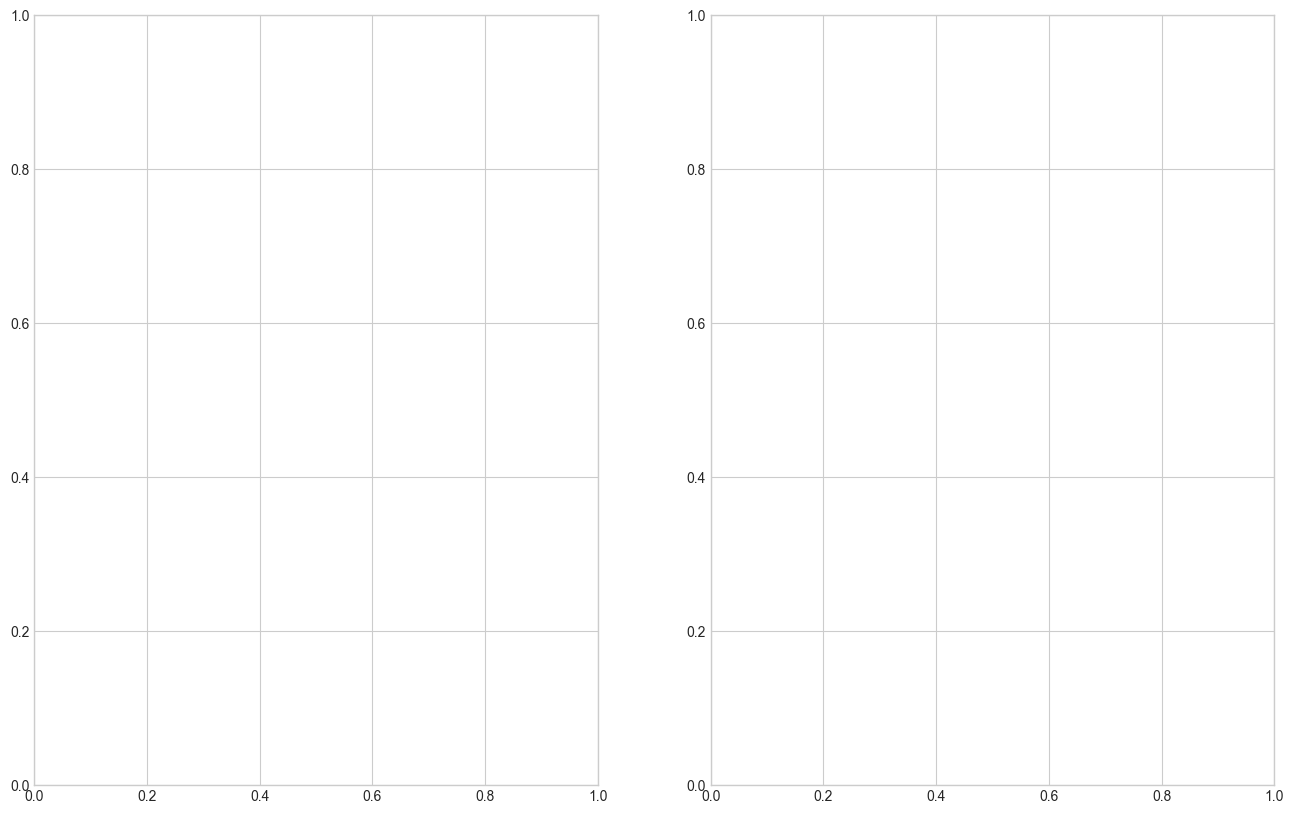

In [22]:

plt.style.use("seaborn-v0_8-whitegrid")

fig, axs = plt.subplots(1, 2, figsize=(16,10))
axs_top = axs[0]
axs_bottom = axs[1]

titles = [
    "Percent Improvement of DL over Coherent by Population Size (Including US)",
    "Percent Improvement of DL over Coherent by Population Size (Excluding US)"
]

improvements = [
    ("coh", percent_improvement_all_countries_no_overall, False),
    ("coh", percent_improvement_all_countries_no_overall, True)
]

for i, (model, improvement_data, drop_usa) in enumerate(improvements):
    ax = axs[i]

    # Filter data
    if drop_usa:
        mask = pop_data_1987_all['Country Code'] != 'USA'
        data_filtered = pop_data_1987_all[mask]
        y_vals = np.array(improvement_data)[mask.to_numpy()]
    else:
        data_filtered = pop_data_1987_all
        y_vals = np.array(improvement_data)

    # Prepare x (log population)
    x_vals = data_filtered['1987'].astype(np.float64).to_numpy()
    log_x = np.log(x_vals)

    # Linear regression
    slope, intercept, r_value, p_value, std_err = linregress(log_x, y_vals)
    x_fit = np.linspace(min(x_vals), max(x_vals), 100)
    y_fit = slope * np.log(x_fit) + intercept

    # Plot data
    ax.scatter(log_x, y_vals, alpha=0.6, color='gray', edgecolor='black', linewidth=0.3)
    ax.plot(np.log(x_fit), y_fit, color='red', linewidth=2, label=f"Slope = {slope:.2f}, p = {p_value:.3f}")

    # Annotate specific countries
    for j in range(len(y_vals)):
        country = data_filtered.iloc[j]['Country Code']
        log_pop = np.log(float(data_filtered.iloc[j]['1987']))
        if country in ['LUX', 'JPN', 'USA']:
            ax.annotate(country,
                        (log_pop, y_vals[j]),
                        textcoords="offset points",
                        xytext=(5, 5),
                        ha='left',
                        fontsize=9,
                        arrowprops=dict(arrowstyle='->', lw=0.5, color='black'))

    # Labels and titles
    ax.set_title(titles[i], fontsize=12, fontweight='bold')
    ax.legend(fontsize=9, loc="best", frameon=True)
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.6)

    if col == 0:
        ax.set_ylabel("Percent Improvement of Deep Learning Model", fontsize=11)
    if row == 1:
        ax.set_xlabel("Log Population (millions)", fontsize=11)

plt.tight_layout()
plt.subplots_adjust(top=0.88)

plt.savefig("../results/pop-size-1x2.pdf", format="pdf", bbox_inches="tight")
plt.show()


Why is deep learning better for some countries and worse for others?

In [23]:
geos_key

array([['AK', '0'],
       ['AL', '1'],
       ['AZ', '2'],
       ['AR', '3'],
       ['CA', '4'],
       ['CO', '5'],
       ['CT', '6'],
       ['DE', '7'],
       ['FL', '8'],
       ['GA', '9'],
       ['HI', '10'],
       ['ID', '11'],
       ['IL', '12'],
       ['IN', '13'],
       ['IA', '14'],
       ['KS', '15'],
       ['KY', '16'],
       ['LA', '17'],
       ['ME', '18'],
       ['MD', '19'],
       ['MA', '20'],
       ['MI', '21'],
       ['MN', '22'],
       ['MS', '23'],
       ['MO', '24'],
       ['MT', '25'],
       ['NE', '26'],
       ['NV', '27'],
       ['NH', '28'],
       ['NJ', '29'],
       ['NM', '30'],
       ['NY', '31'],
       ['NC', '32'],
       ['ND', '33'],
       ['OH', '34'],
       ['OK', '35'],
       ['OR', '36'],
       ['PA', '37'],
       ['RI', '38'],
       ['SC', '39'],
       ['SD', '40'],
       ['TN', '41'],
       ['TX', '42'],
       ['UT', '43'],
       ['VT', '44'],
       ['VA', '45'],
       ['WA', '46'],
       ['WV', '47'],
  

Ukraine had one of the largest gender gaps in life expectancy in Europe

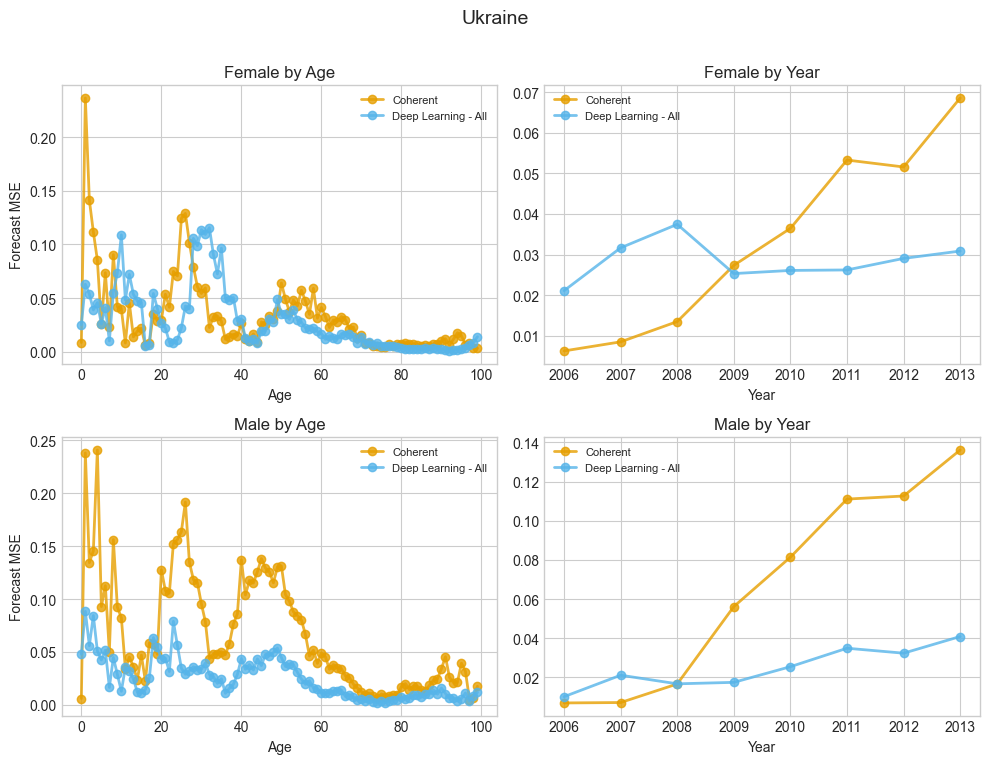

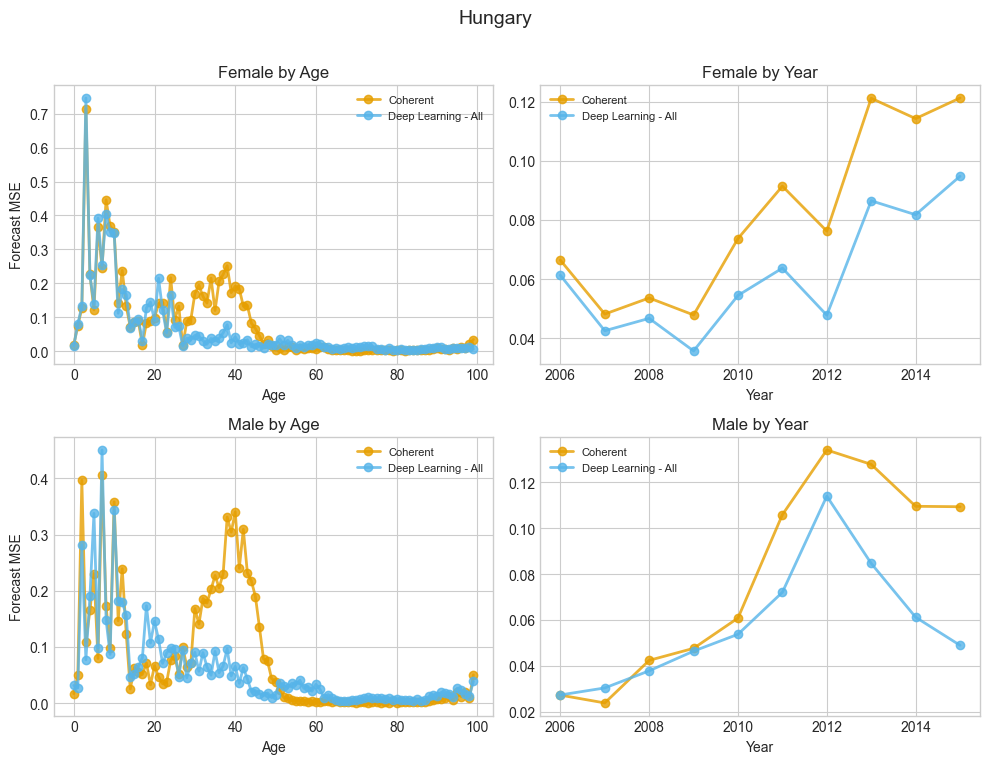

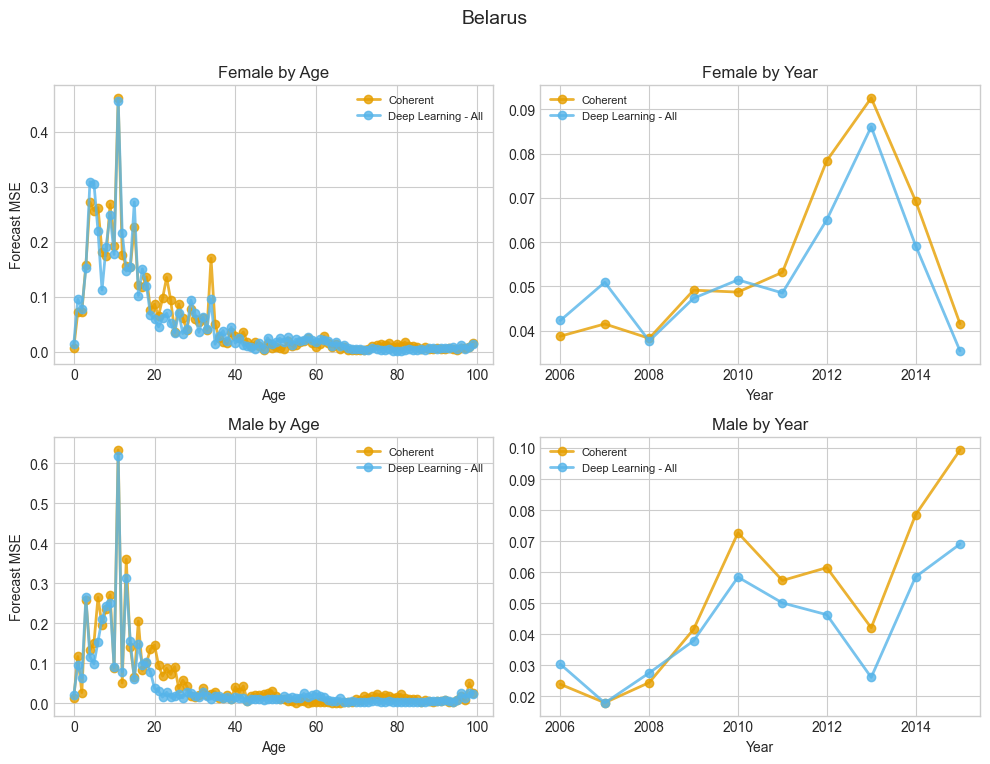

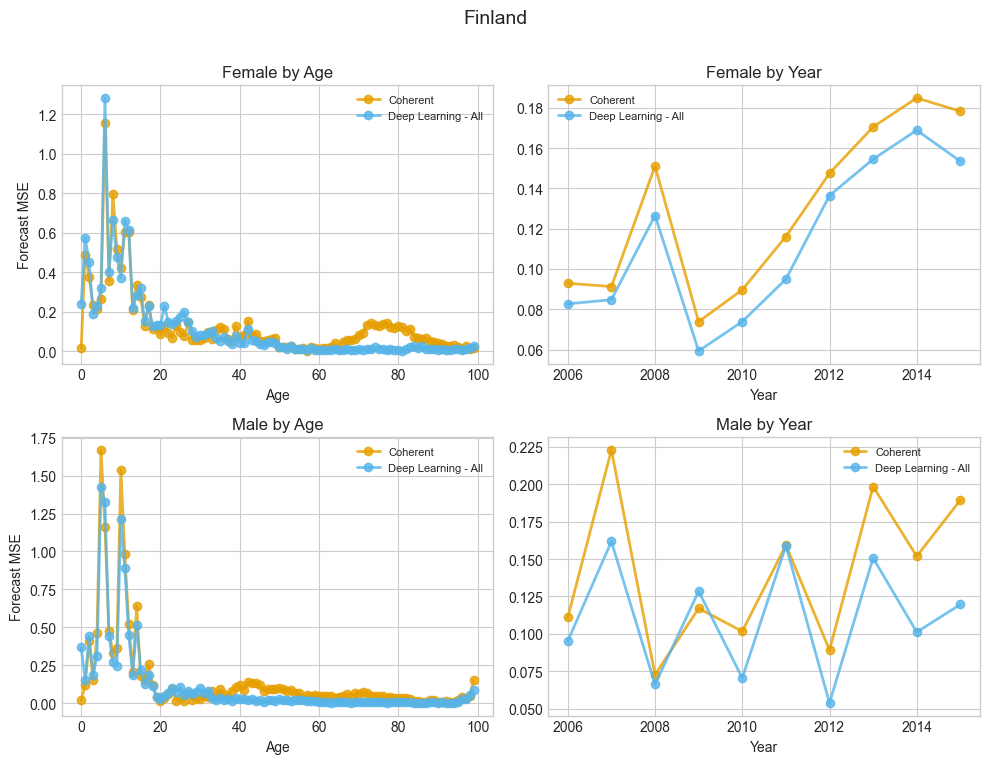

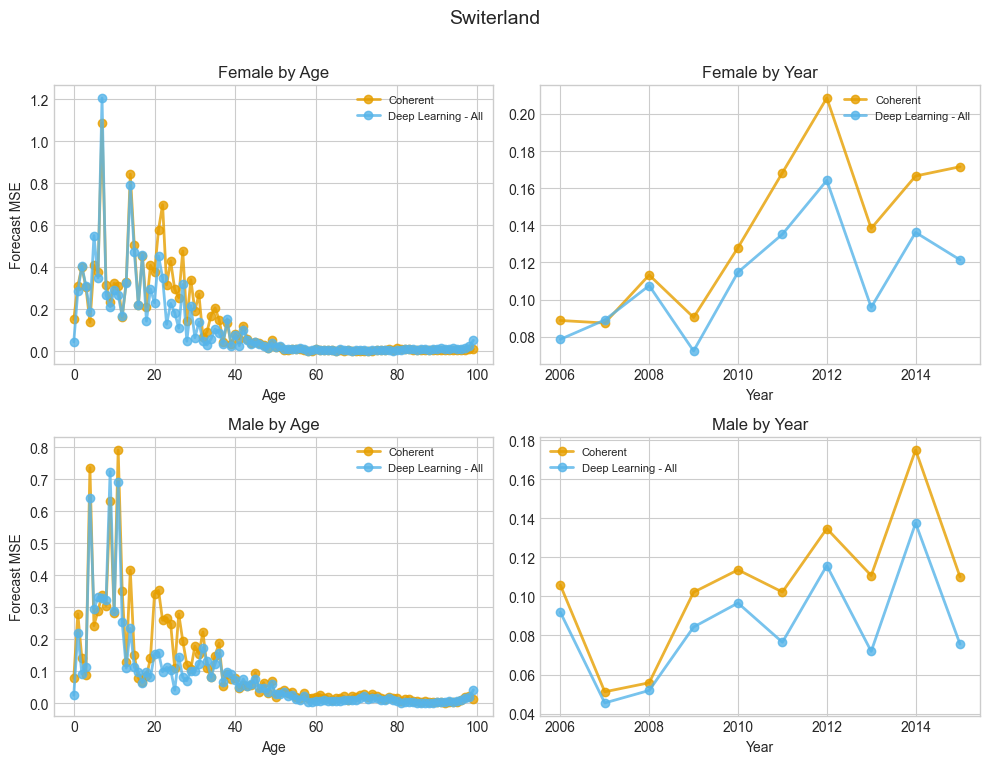

In [28]:
# Simple top performer / US figures 
sns.set_style("whitegrid")
palette = ["#E69F00", "#56B4E9", "#009E73"]  # orange, sky blue, green

def compute_avg_mses(country_index: int,
                     feature_index: int,
                     gender_index: int | None = None):
    """
    Returns:
        {model_label: {feature_value: avg_mse, ...}, ...}
    gender_index
        0 → Female-only rows
        1 → Male-only rows
        None → keep both genders
    """
    model_data = {
        "Coherent": c_test_divided,
        "Deep Learning - All": dl_test_divided
    }
    avg_mses = {}

    for label, test_data in model_data.items():
        fold_mse_dicts = []

        for fold in range(5):
            y_pred_fold = test_data[fold][country_index]          # (N_pred, …)
            y_true_full = actual_data_divided[country_index]      # (N_true, …)

            # --------  make sure the two arrays are the same length ---------
            n = min(len(y_pred_fold), len(y_true_full))
            y_pred = y_pred_fold[:n]
            y_true = y_true_full[:n]

            # ---------- optional gender filtering ---------------------------
            if gender_index is not None:
                gender_mask = (y_true[:, 1] == gender_index)      # 1 ⇒ “Gender” col
                y_pred = y_pred[gender_mask]
                y_true = y_true[gender_mask]

            # ---------- calculate error in the usual way --------------------
            mse_d, _, _ = evaluation_functions.calculate_error_by_category(
                y_pred,
                y_true,
                feature_index=feature_index
            )
            fold_mse_dicts.append(mse_d)

        # -------- average the five dictionaries ----------------------------
        combined = {}
        for d in fold_mse_dicts:
            for k, v in d.items():
                total, cnt = combined.get(k, (0.0, 0))
                combined[k] = (total + v, cnt + 1)

        avg_mses[label] = {k: tot / cnt for k, (tot, cnt) in combined.items()}

    return avg_mses



countries = {"Ukraine": 38, "Hungary": 19, "Belarus": 2, "Finland": 13, "Switerland": 6}
features = {"Age": 3, "Year": 2}  
genders = {"Female": 0, "Male": 1}


for country_name, country_idx in countries.items():
    fig, axes = plt.subplots(2, 2, figsize=(10, 8), sharey=False)
    for r, (gender_name, g_idx)  in enumerate(genders.items()):
        for c, (feat_name, f_idx) in enumerate(features.items()):
            ax = axes[r, c]
            avg_mses = compute_avg_mses(country_idx, f_idx, g_idx)

            for i, (label, data) in enumerate(avg_mses.items()):
                x, y = zip(*sorted(data.items()))
                ax.plot(x, y,
                        label=label,
                        marker="o",
                        linewidth=2,
                        alpha=0.8,
                        color=palette[i])

            ax.set_title(f"{gender_name} by {feat_name}")
            ax.set_xlabel(feat_name)
            if c == 0:
                ax.set_ylabel("Forecast MSE")
            ax.legend(fontsize=8, loc="best")

    fig.suptitle(country_name, fontsize=14)
    fig.tight_layout(rect=[0, 0.03, 1, 0.97])
    plt.show()

Look at actual rates in Ukraine and US 

In [29]:
actual_data_divided

[array([[ 5.00000000e+01,  0.00000000e+00,  2.00600000e+03,
          0.00000000e+00, -5.46531691e+00],
        [ 5.00000000e+01,  1.00000000e+00,  2.00600000e+03,
          0.00000000e+00, -5.22711361e+00],
        [ 5.00000000e+01,  0.00000000e+00,  2.00600000e+03,
          1.00000000e+00, -7.85193121e+00],
        ...,
        [ 5.00000000e+01,  1.00000000e+00,  2.01500000e+03,
          9.80000000e+01, -8.61076011e-01],
        [ 5.00000000e+01,  0.00000000e+00,  2.01500000e+03,
          9.90000000e+01, -1.01348744e+00],
        [ 5.00000000e+01,  1.00000000e+00,  2.01500000e+03,
          9.90000000e+01, -8.51060263e-01]]),
 array([[ 5.10000000e+01,  0.00000000e+00,  2.00600000e+03,
          0.00000000e+00, -5.77603064e+00],
        [ 5.10000000e+01,  1.00000000e+00,  2.00600000e+03,
          0.00000000e+00, -5.49408897e+00],
        [ 5.10000000e+01,  0.00000000e+00,  2.00600000e+03,
          1.00000000e+00, -7.93777478e+00],
        ...,
        [ 5.10000000e+01,  1.0000000

In [64]:
ukraine = actual_data_divided[38]
ukraine_filtered = ukraine[ukraine[:, 1] == 1]
ukraine_filtered = ukraine_filtered[ukraine_filtered[:, 2] == 2012]
print(ukraine_filtered.shape)

(100, 5)


In [57]:
ukraine_dl = dl_test_divided[0][38]
ukraine_dl_filtered = ukraine_dl[ukraine_dl[:, 1] == 1]
ukraine_dl_filtered = ukraine_dl_filtered[ukraine_dl_filtered[:, 2] == 2012]
print(ukraine_dl_filtered.shape)


(100, 5)


In [58]:
ukraine_c = c_test_divided[0][38]
ukraine_c_filtered = ukraine_c[ukraine_c[:, 1] == 1]
ukraine_c_filtered = ukraine_c_filtered[ukraine_c_filtered[:, 2] == 2012]
print(ukraine_c_filtered.shape)

(100, 5)


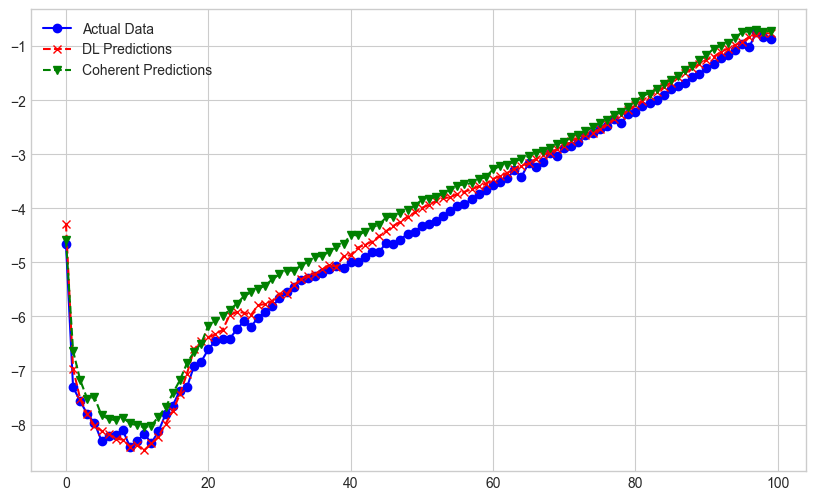

In [59]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(ukraine_filtered[:,3], ukraine_filtered[:,4], marker='o', linestyle='-', color='blue', label='Actual Data')
ax.plot(ukraine_dl_filtered[:,3], ukraine_dl_filtered[:,4], marker='x', linestyle='--', color='red', label='DL Predictions')
ax.plot(ukraine_c_filtered[:,3], ukraine_c_filtered[:,4], marker='v', linestyle='--', color='green', label='Coherent Predictions')
plt.legend()
plt.show()

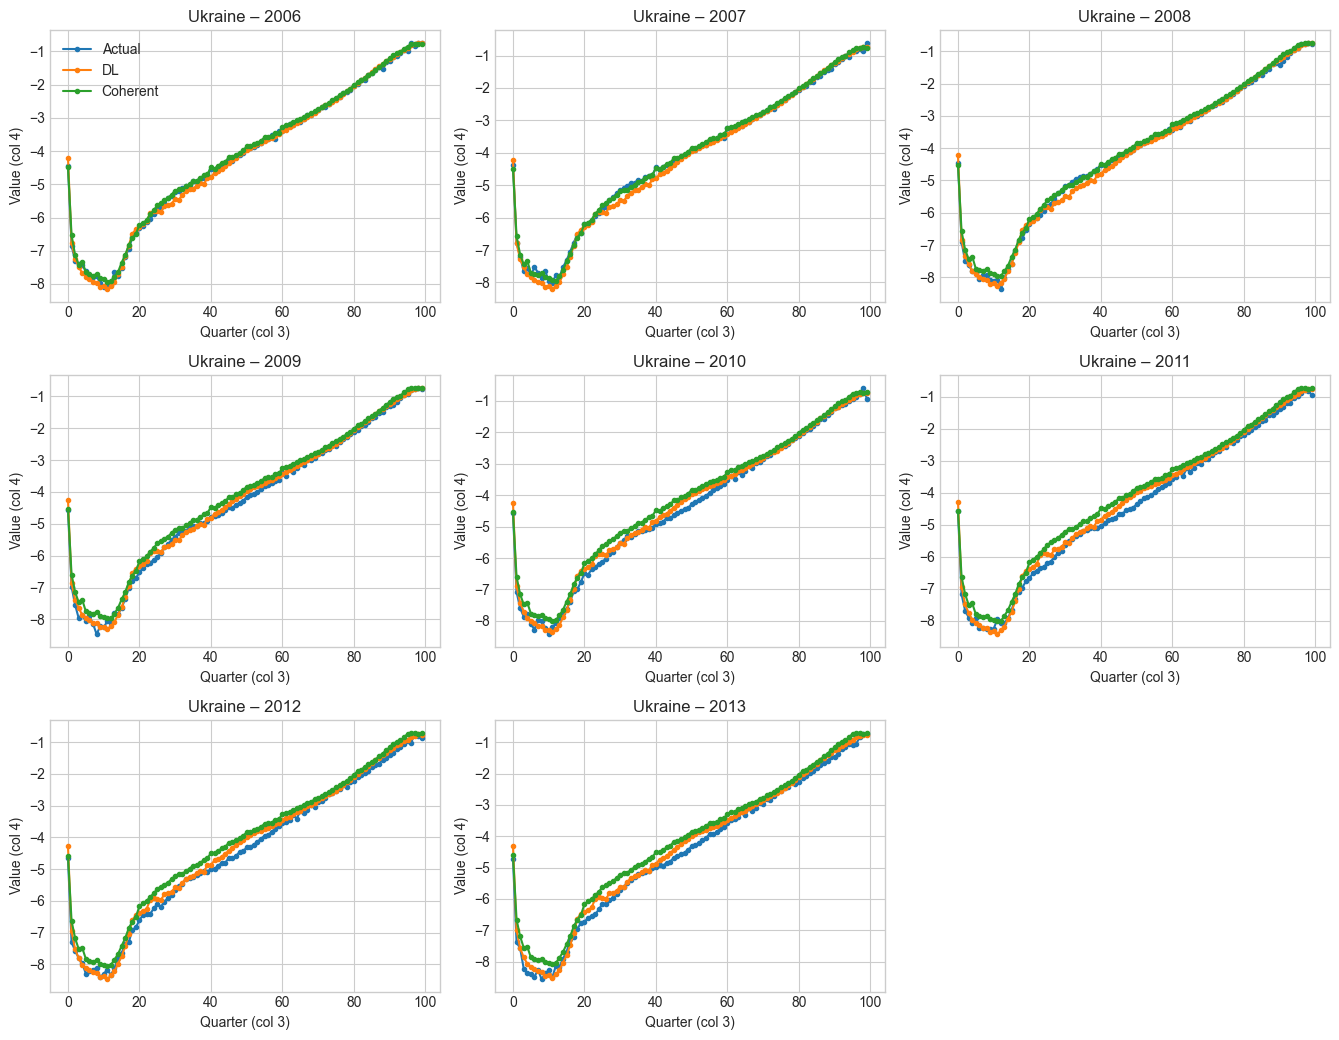

In [68]:
from math import ceil

# --- 1. Pre-slice the three Ukraine matrices -----------------
ukraine_act = actual_data_divided[38]
ukraine_dl  = dl_test_divided[0][38]
ukraine_coh = c_test_divided[0][38]

# --- 2.  Years present *after* applying col-1 == 1 ----------
wanted_rows = ukraine_act[:, 1] == 1          # col 1 is the sex/series flag
years = np.unique(ukraine_act[wanted_rows, 2]).astype(int)   # col 2 is the year

# --- 3.  Grid for subplots -----------------------------------
n_yrs  = len(years)
n_cols = min(3, n_yrs)
n_rows = ceil(n_yrs / n_cols)

fig, axes = plt.subplots(
    n_rows, n_cols,
    figsize=(4.5 * n_cols, 3.5 * n_rows),
    sharex=False, sharey=False,
)
axes = np.atleast_2d(axes)        # make sure it’s 2-D

# --- 4.  One panel per year ----------------------------------
for i, yr in enumerate(years):
    r, c = divmod(i, n_cols)
    ax   = axes[r, c]

    # Boolean masks: column-1 == 1  AND  column-2 == yr
    m_act = (ukraine_act[:, 1] == 1) & (ukraine_act[:, 2] == yr)
    m_dl  = (ukraine_dl [:, 1] == 1) & (ukraine_dl [:, 2] == yr)
    m_coh = (ukraine_coh[:, 1] == 1) & (ukraine_coh[:, 2] == yr)

    a   = ukraine_act[m_act]
    dl  = ukraine_dl [m_dl]
    coh = ukraine_coh[m_coh]

    ax.plot(a[:, 3],   a[:, 4],  '.-', label='Actual')
    ax.plot(dl[:, 3], dl[:, 4], '.-', label='DL')
    ax.plot(coh[:, 3], coh[:, 4], '.-', label='Coherent')

    ax.set_title(f'Ukraine – {yr}')
    ax.set_xlabel('Quarter (col 3)')
    ax.set_ylabel('Value (col 4)')
    if i == 0:
        ax.legend()

# --- 5.  Remove any unused axes ------------------------------
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flat[j])

fig.tight_layout()
plt.show()


In [60]:
us = actual_data_divided[39]
us_filtered = us[us[:, 1] == 1]
us_filtered = us_filtered[us_filtered[:, 2] == 2012]
print(us_filtered.shape)

(100, 5)


In [61]:
us_dl = dl_test_divided[0][39]
us_dl_filtered = us_dl[us_dl[:, 1] == 1]
us_dl_filtered = us_dl_filtered[us_dl_filtered[:, 2] == 2012]
print(us_dl_filtered.shape)


(100, 5)


In [62]:
us_c = c_test_divided[0][39]
us_c_filtered = us_c[us_c[:, 1] == 1]
us_c_filtered = us_c_filtered[us_c_filtered[:, 2] == 2012]
print(us_c_filtered.shape)

(100, 5)


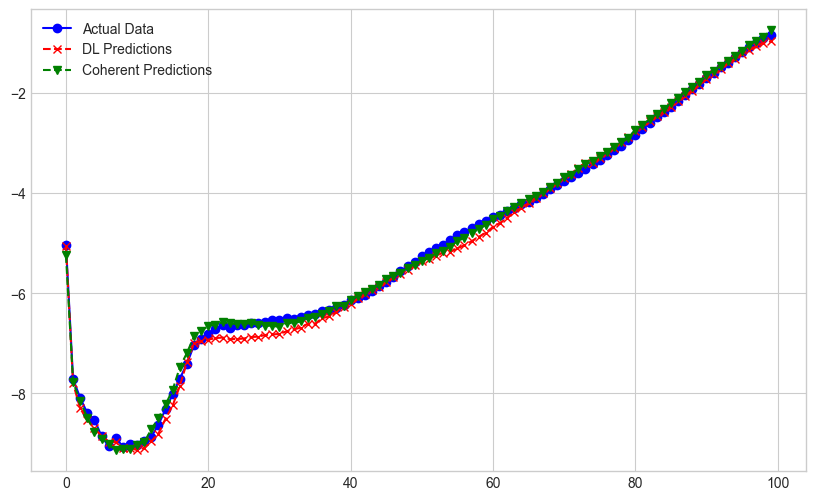

In [63]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(us_filtered[:,3], us_filtered[:,4], marker='o', linestyle='-', color='blue', label='Actual Data')
ax.plot(us_dl_filtered[:,3], us_dl_filtered[:,4], marker='x', linestyle='--', color='red', label='DL Predictions')
ax.plot(us_c_filtered[:,3], us_c_filtered[:,4], marker='v', linestyle='--', color='green', label='Coherent Predictions')
plt.legend()
plt.show()

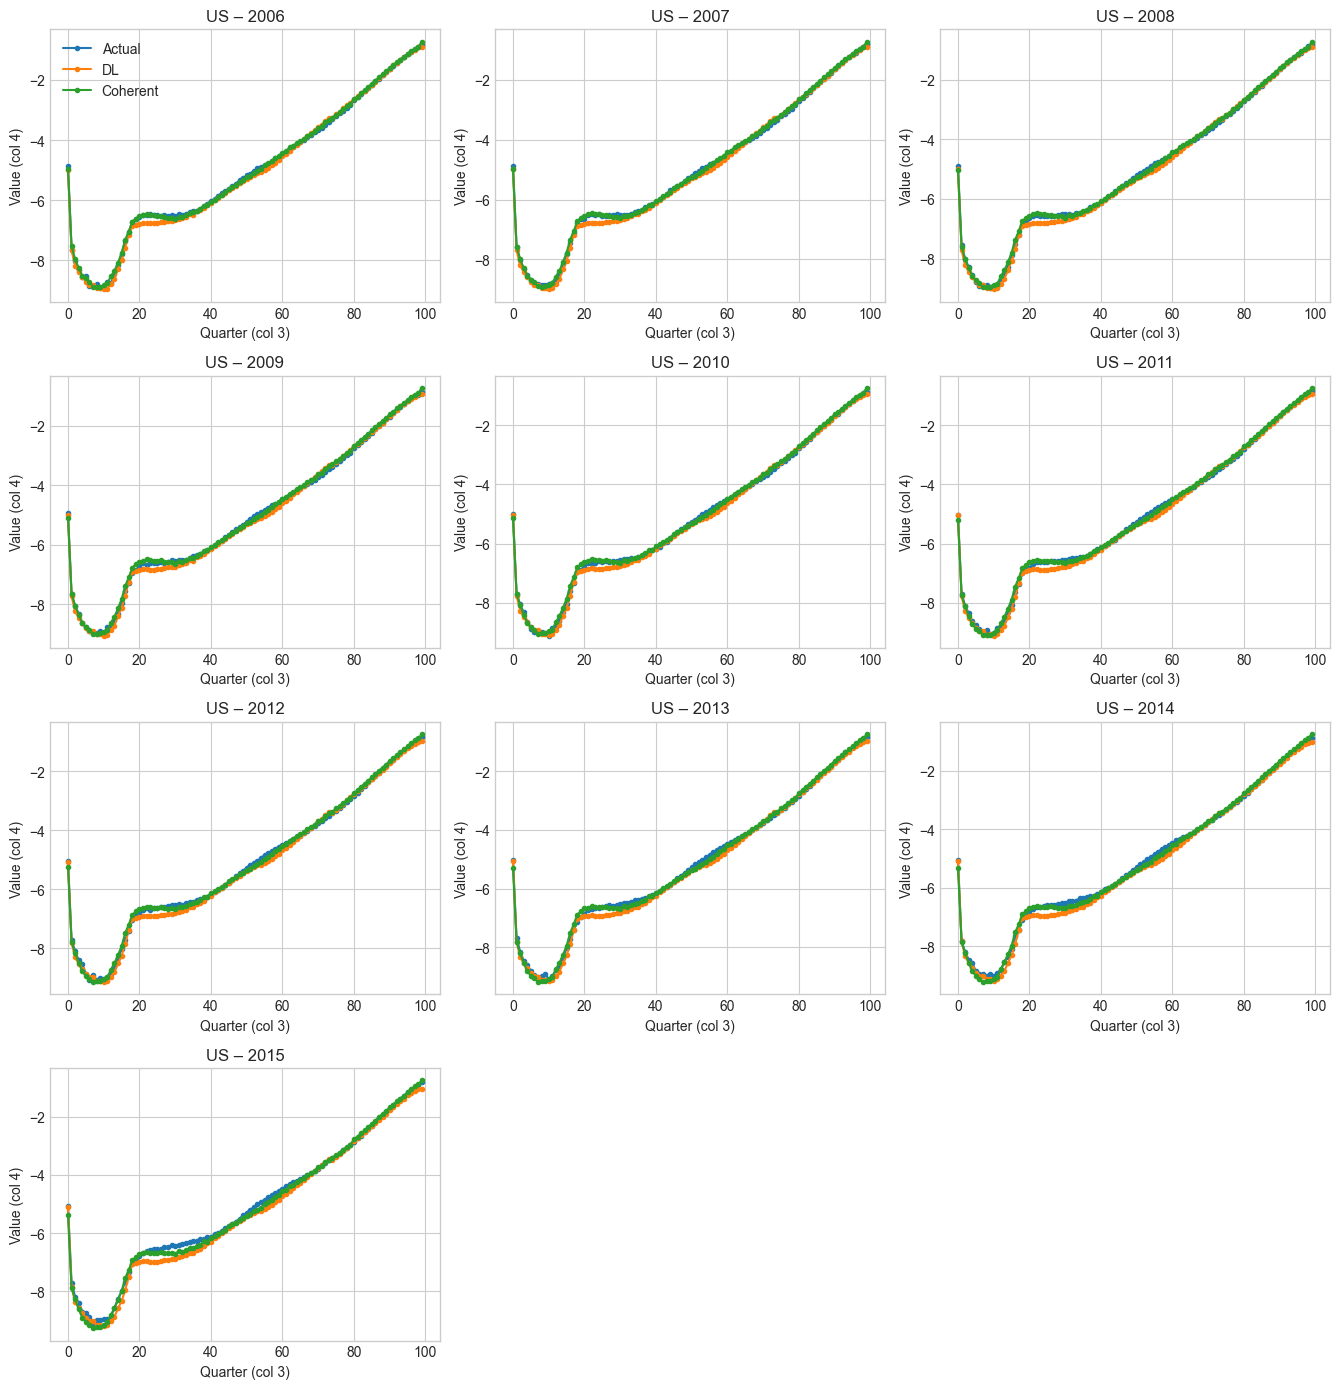

In [ ]:
# --- 1.  Slice the three US matrices once -------------------------------------
us_act = actual_data_divided[39]
us_dl  = dl_test_divided[0][39]
us_coh = c_test_divided[0][39]

# --- 2.  Work out which years we need (after col-1 == 1) ----------------------
mask_series_1 = us_act[:, 1] == 1
years = np.unique(us_act[mask_series_1, 2]).astype(int)
years.sort()          # ascending just looks nicer

# --- 3.  Layout: ≤3 columns, as many rows as needed ---------------------------
n_yrs  = len(years)
n_cols = min(3, n_yrs)
n_rows = ceil(n_yrs / n_cols)

fig, axes = plt.subplots(
    n_rows, n_cols,
    figsize=(4.5 * n_cols, 3.5 * n_rows),
    sharex=False, sharey=False,
)
axes = np.atleast_2d(axes)  # guarantees 2-D indexing

# --- 4.  One subplot per year -------------------------------------------------
for i, yr in enumerate(years):
    r, c = divmod(i, n_cols)
    ax   = axes[r, c]

    # booleans: (col-1 == 1) & (col-2 == yr)
    m_act = (us_act[:, 1] == 1) & (us_act[:, 2] == yr)
    m_dl  = (us_dl [:, 1] == 1) & (us_dl [:, 2] == yr)
    m_coh = (us_coh[:, 1] == 1) & (us_coh[:, 2] == yr)

    a   = us_act[m_act]
    dl  = us_dl [m_dl]
    coh = us_coh[m_coh]

    ax.plot(a[:, 3],   a[:, 4],  '.-', label='Actual')
    ax.plot(dl[:, 3], dl[:, 4], '.-', label='DL')
    ax.plot(coh[:, 3], coh[:, 4], '.-', label='Coherent')

    ax.set_title(f'US – {yr}')
    ax.set_xlabel('Quarter (col 3)')
    ax.set_ylabel('Value (col 4)')
    if i == 0:                       # legend once to avoid clutter
        ax.legend()

# --- 5.  Remove any empty axes slots ------------------------------------------
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flat[j])

fig.tight_layout()
plt.show()

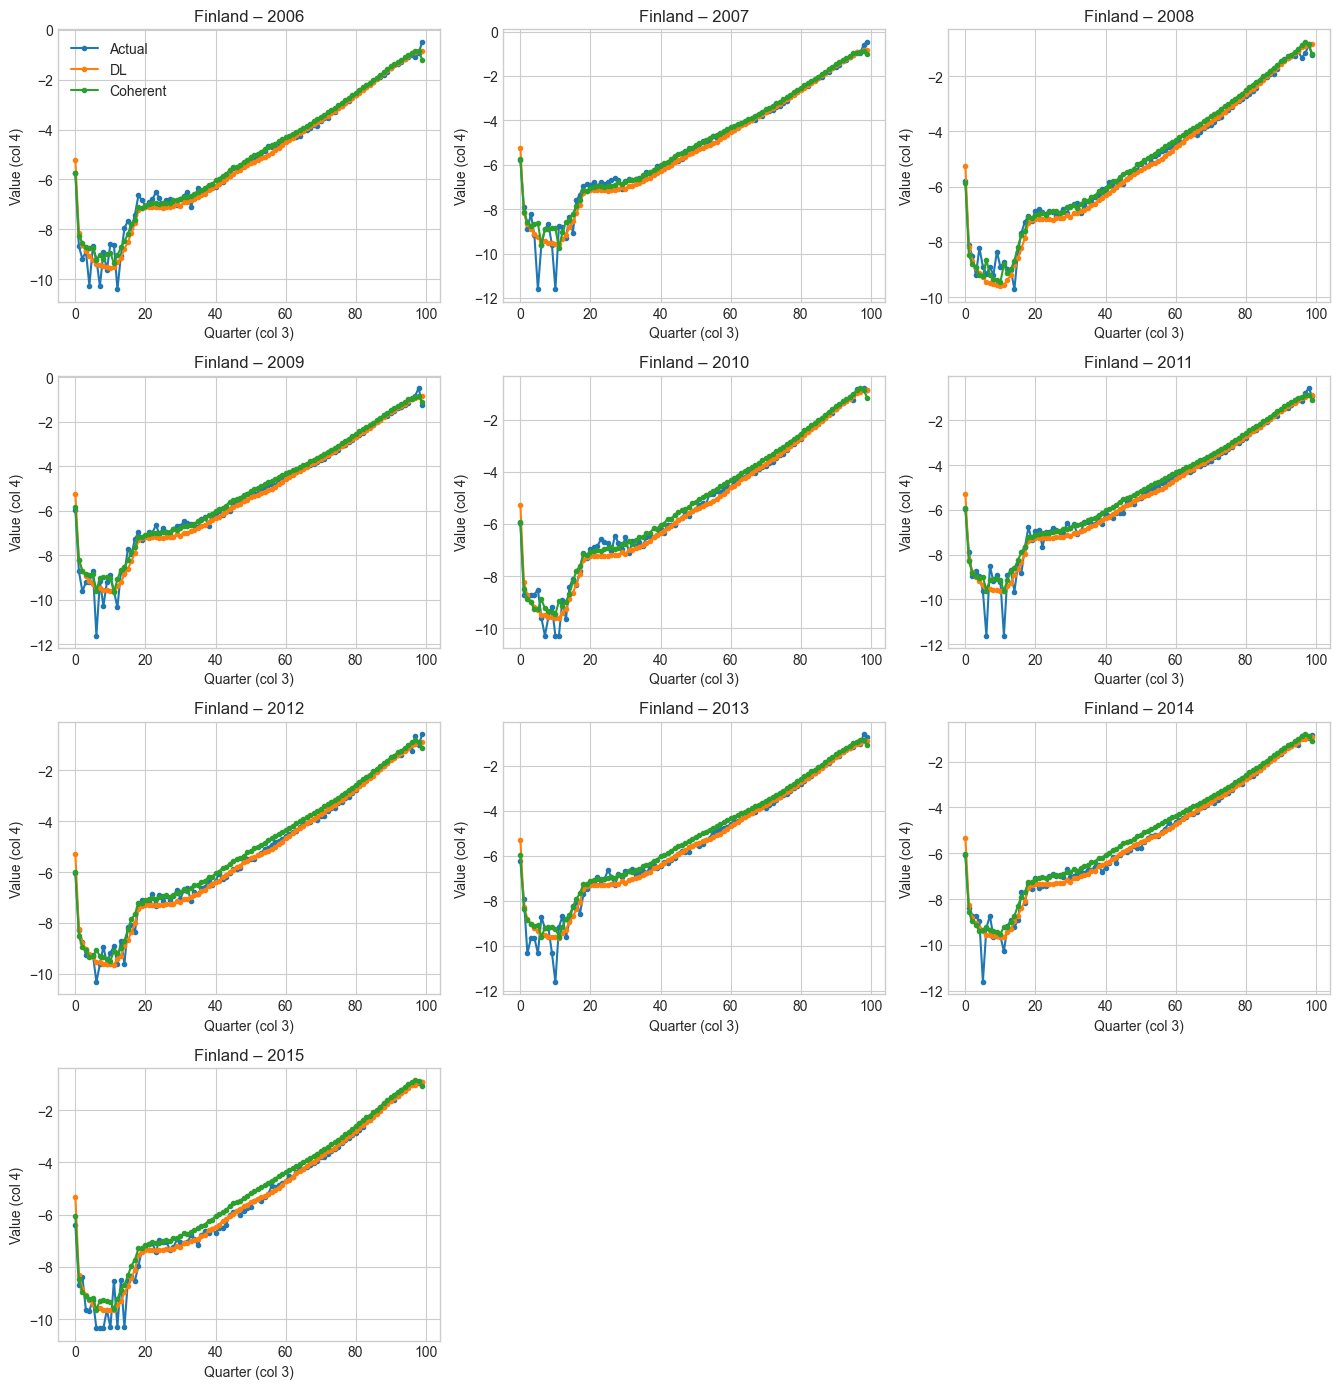

In [71]:
# --- 1.  Grab Finland matrices once -------------------------------------------
fin_act = actual_data_divided[13]
fin_dl  = dl_test_divided[0][13]
fin_coh = c_test_divided[0][13]

# --- 2.  Which years matter after col-1 == 1? ---------------------------------
mask_series1 = fin_act[:, 1] == 1
years = np.unique(fin_act[mask_series1, 2]).astype(int)
years.sort()

# --- 3.  Sub-plot grid layout --------------------------------------------------
n_yrs  = len(years)
n_cols = min(3, n_yrs)          # stick to ≤3 columns
n_rows = ceil(n_yrs / n_cols)

fig, axes = plt.subplots(
    n_rows, n_cols,
    figsize=(4.5 * n_cols, 3.5 * n_rows),
    sharex=False, sharey=False,
)
axes = np.atleast_2d(axes)      # guarantees 2-D indexing

# --- 4.  One panel per year ----------------------------------------------------
for i, yr in enumerate(years):
    r, c = divmod(i, n_cols)
    ax   = axes[r, c]

    # column-1 == 1  AND  column-2 == yr
    m_act = (fin_act[:, 1] == 1) & (fin_act[:, 2] == yr)
    m_dl  = (fin_dl [:, 1] == 1) & (fin_dl [:, 2] == yr)
    m_coh = (fin_coh[:, 1] == 1) & (fin_coh[:, 2] == yr)

    a   = fin_act[m_act]
    dl  = fin_dl [m_dl]
    coh = fin_coh[m_coh]

    ax.plot(a[:, 3],   a[:, 4],  '.-', label='Actual')
    ax.plot(dl[:, 3], dl[:, 4], '.-', label='DL')
    ax.plot(coh[:, 3], coh[:, 4], '.-', label='Coherent')

    ax.set_title(f'Finland – {yr}')
    ax.set_xlabel('Quarter (col 3)')
    ax.set_ylabel('Value (col 4)')
    if i == 0:
        ax.legend()

# --- 5.  Remove unused axes slots (if any) -------------------------------------
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flat[j])

fig.tight_layout()
plt.show()

